# Tópicos extra

En este anexo se revisan algunos tópicos específicos relacionados a la librería `pandas` que no fueron cubiertos anteriormente, estos son

- Objeto `pandas.Series`
- Gráficos a partir de objetos de pandas
- Guardar y leer datos en formato HDF5

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Objeto `pandas.Series`

El objeto [`pandas.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) es  un arreglo de una dimensión (vector) que **representa una secuencia** 

- Los elementos de la secuencia se identifican con un índice etiquetado `index`
- Todos los elementos son de un mismo tipo `dtype`
- La serie se identifica con un nombre `name`

A continuación veremos algunas formas de crear `Series`

**Construyendo un objeto `Series` a partir de un dataframe**

Cuando pedimos **una columna** de un DataFrame el objeto retornado es de tipo `Series`

Tecnicamente, **una fila** de un DataFrame también retorna como `Series` sin embargo los tipos se mezclan

In [2]:
clientes = ['Pablo', 'Marianna', 'Matthieu', 'Luis', 'Eliana', 'Cristobal']

ventas = {
    'lechugas [unidades]': [1, 0, 1, 2, 0, 0],
    'papas [kilos]': [0.5, 2, 1.5, 1.2, 0, 5]
}

df = pd.DataFrame(data=ventas, index=clientes)

In [3]:
display(f'La columna de lechugas es un objeto {type(df["lechugas [unidades]"])}',
        f'cuyo tipo es {df["lechugas [unidades]"].dtype}',
        f'La fila Matthieu es un objeto {type(df.loc["Matthieu"])}',
        f'cuyo tipo es {df.loc["Matthieu"].dtype}') 

"La columna de lechugas es un objeto <class 'pandas.core.series.Series'>"

'cuyo tipo es int64'

"La fila Matthieu es un objeto <class 'pandas.core.series.Series'>"

'cuyo tipo es float64'

**Construyendo un objeto `Series` a partir de otras estructuras de datos**

Un objeto `Series` se puede crear de forma más general usando el constructor

```python
pandas.Series(data=None, 
              index=None,
              dtype=None, 
              name=None, 
              copy=False, 
              fastpath=False)

```

donde `data` puede ser un  diccionarios, una lista o un ndarray

Por ejemplo:

In [4]:
plan_diario= {'dormir': 7, 'comer': 1, 'quehaceres': 1, 'trabajo': 10, 'procastinar': 5}

pd.Series(plan_diario, name='mi planificación de hoy')

dormir          7
comer           1
quehaceres      1
trabajo        10
procastinar     5
Name: mi planificación de hoy, dtype: int64

:::{note}

- Una columna o una fila de un `DataFrame` es un `Series`
- Varias `Series` se pueden unir para formar un `DataFrame`

:::

## Gráfico a partir de DataFrames

Se pueden crear gráficos sencillos directamente de un `DataFrame`

Puedes revisar en detalle la API para graficar en este [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

/tmp/ipykernel_23473/1562864067.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.plot(ax=ax, kind='line', subplots=True);


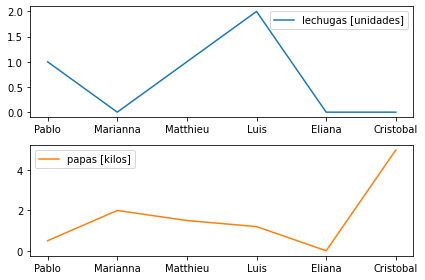

In [5]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
df.plot(ax=ax, kind='line', subplots=True);

La API es útil para hacer gráficos rapidamente. Si necesitamos mayor flexibilidad que la que ofrece la API siempre podemos extraer la data y graficarla con `matplotlib` o `seaborn`

## Guardar y leer una tabla en formato HDF5

Podemos usar el atributo `to_hdf` para convertir nuestra tabla a formato HDF5

```python
df.to_hdf(path_or_buf, # Path completo con nombre de archivo
          key: str, # Llave maestra del archivo
          mode: str = 'a', # Agrega lineas a un archivo existente (a) o crea una archivo nuevo (w)
          ...
         )
```

Por ejemplo

```python
df.to_hdf("pandas_hdf.h5", key='excel', mode='w')
```

crea un archivo pandas_hdf.h5 en el directorio actual

Para lectura podemos usar la función `read_hdf`

```python
mi_tabla_recuperada = pd.read_hdf("pandas_hdf.h5", key='/excel', mode='r')
```

```{note}
Para tener esta funcionalidad se requiere instalar Pytables mayor a 3.5: https://github.com/PyTables/PyTables/issues/719
```

Si necesita trabajar directamente sobre un archivo HDF5 en Python puede usar las librerías `PyTables` o `h5py`. A continuación se muestra un ejemplo con esta última:

```python
import h5py
with h5py.File("pandas_hdf.h5", mode="r") as f:
    print(f["excel"].keys())
    print(f["excel"]['block0_items'][()])
```